<a href="https://colab.research.google.com/github/hynrytero/DAALGO-CS203/blob/main/Train_custom_YOLOV11_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Train YOLO11 Object Detection on a Custom Dataset**

# **Install Ultralytics**

In [ ]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.4/881.4 kB 36.7 MB/s eta 0:00:00


# **Import all necessary Libraries**

In [ ]:
from ultralytics import YOLO
from IPython.display import Image,display

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## **Download Dataset From Roboflow**

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="XUbkJyoA9DB54Y3GJ43f")
project = rf.workspace("wdaw").project("fire-w6h8d")
version = project.version(2)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fire-2 in yolov11:: 100%|██████████| 292/292 [00:00<00:00, 8020.86it/s]


# **Custom Training**

In [ ]:
!yolo task=detect mode=train model=yolo11n.pt data=/content/fire-2/data.yaml epochs=80 imgsz=640 plots=True

100% 5.35M/5.35M [00:00<00:00, 329MB/s]
WARNING ⚠️ yolo11n.pt appears to require 'dill', which is not in Ultralytics requirements.
AutoInstall will run now for 'dill' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official Ultralytics model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['dill'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 62.7 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 3.2s, installed 1 package: ['dill']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

Ultralytics 8.3.2 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/fire-2/data.yaml, epochs=80, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, proje

# **View Training Results**

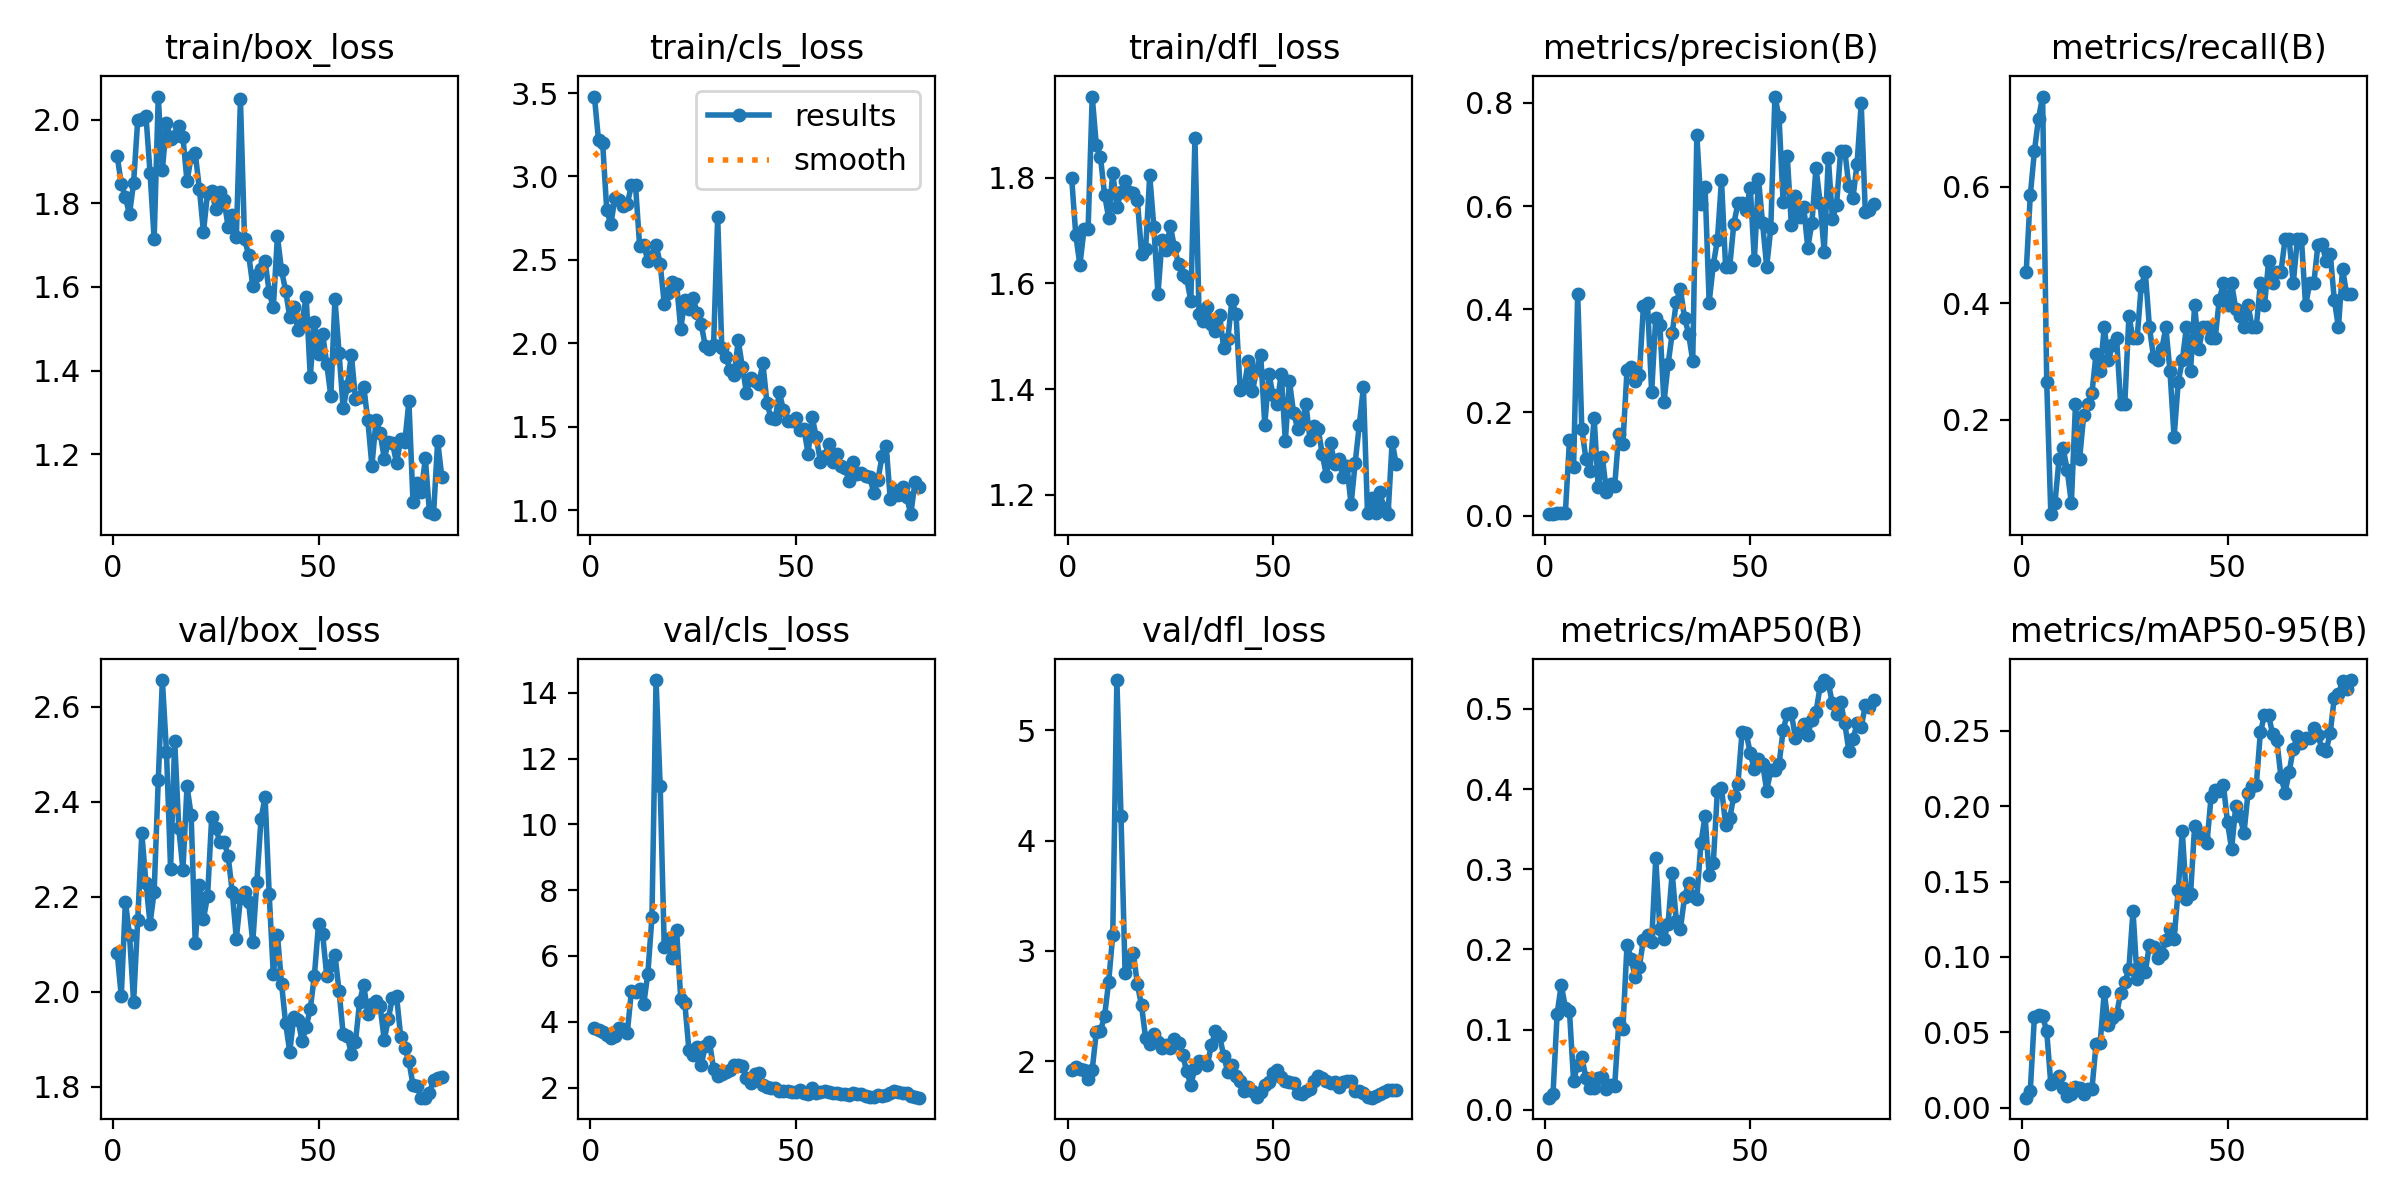

In [ ]:
display(Image(filename='/content/runs/detect/train/results.png', width=600))

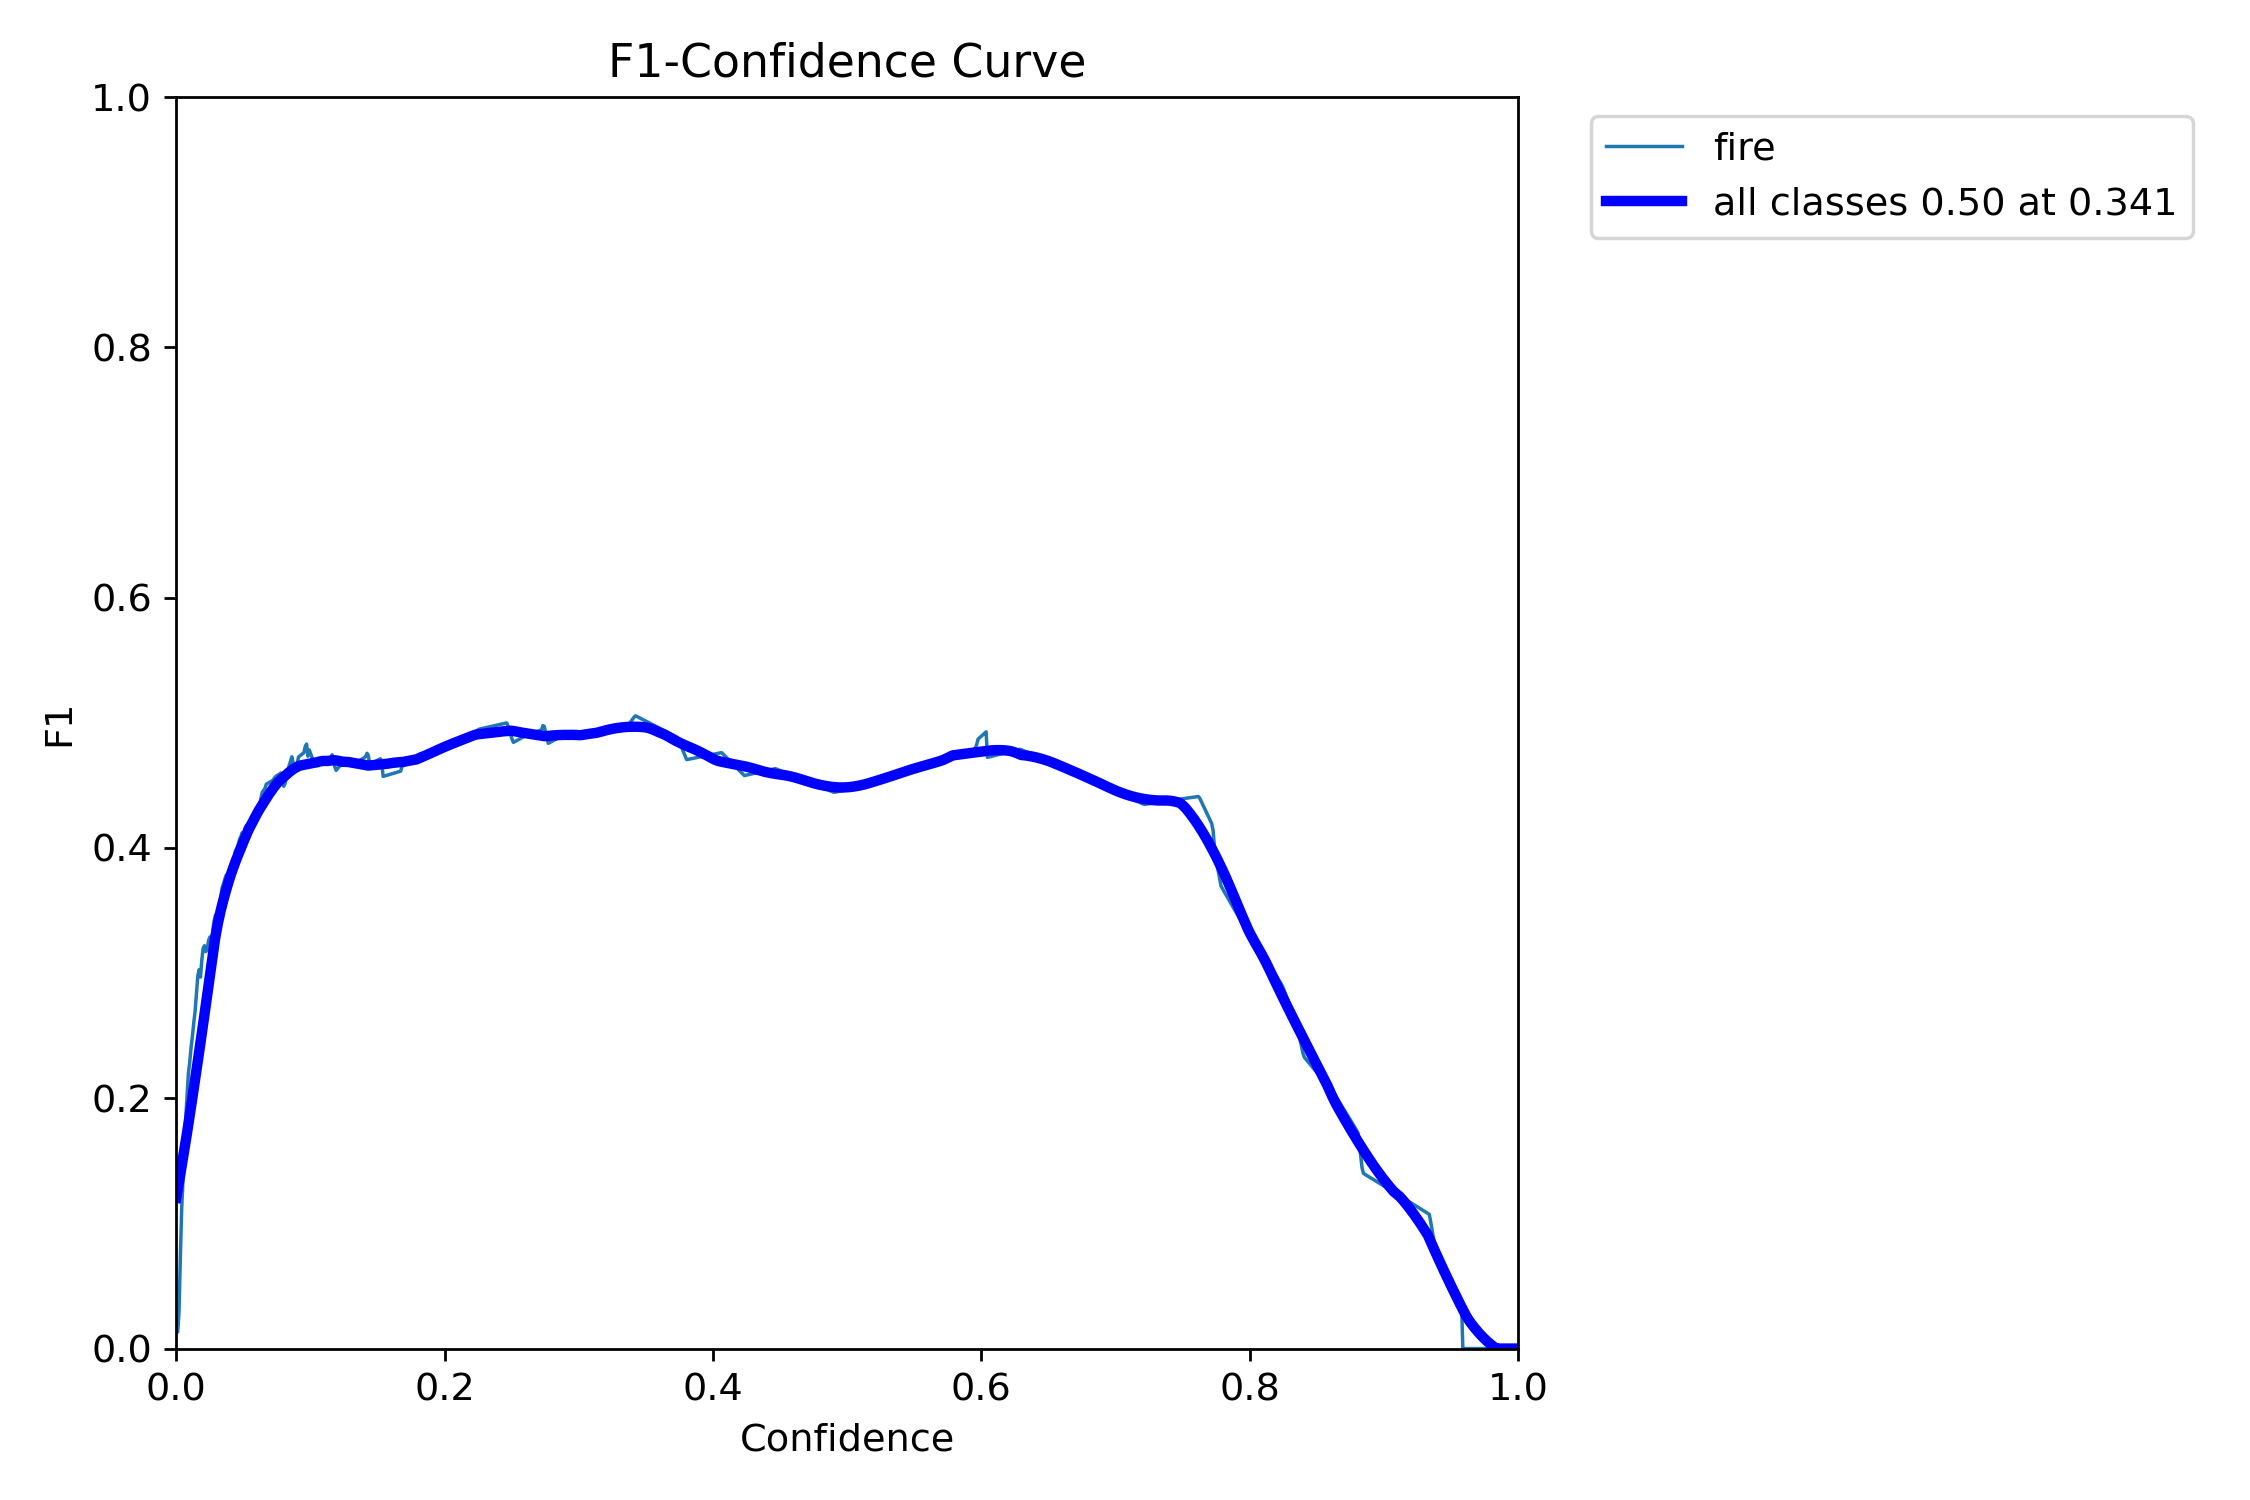

In [ ]:
display(Image(filename='/content/runs/detect/train/F1_curve.png', width=600))

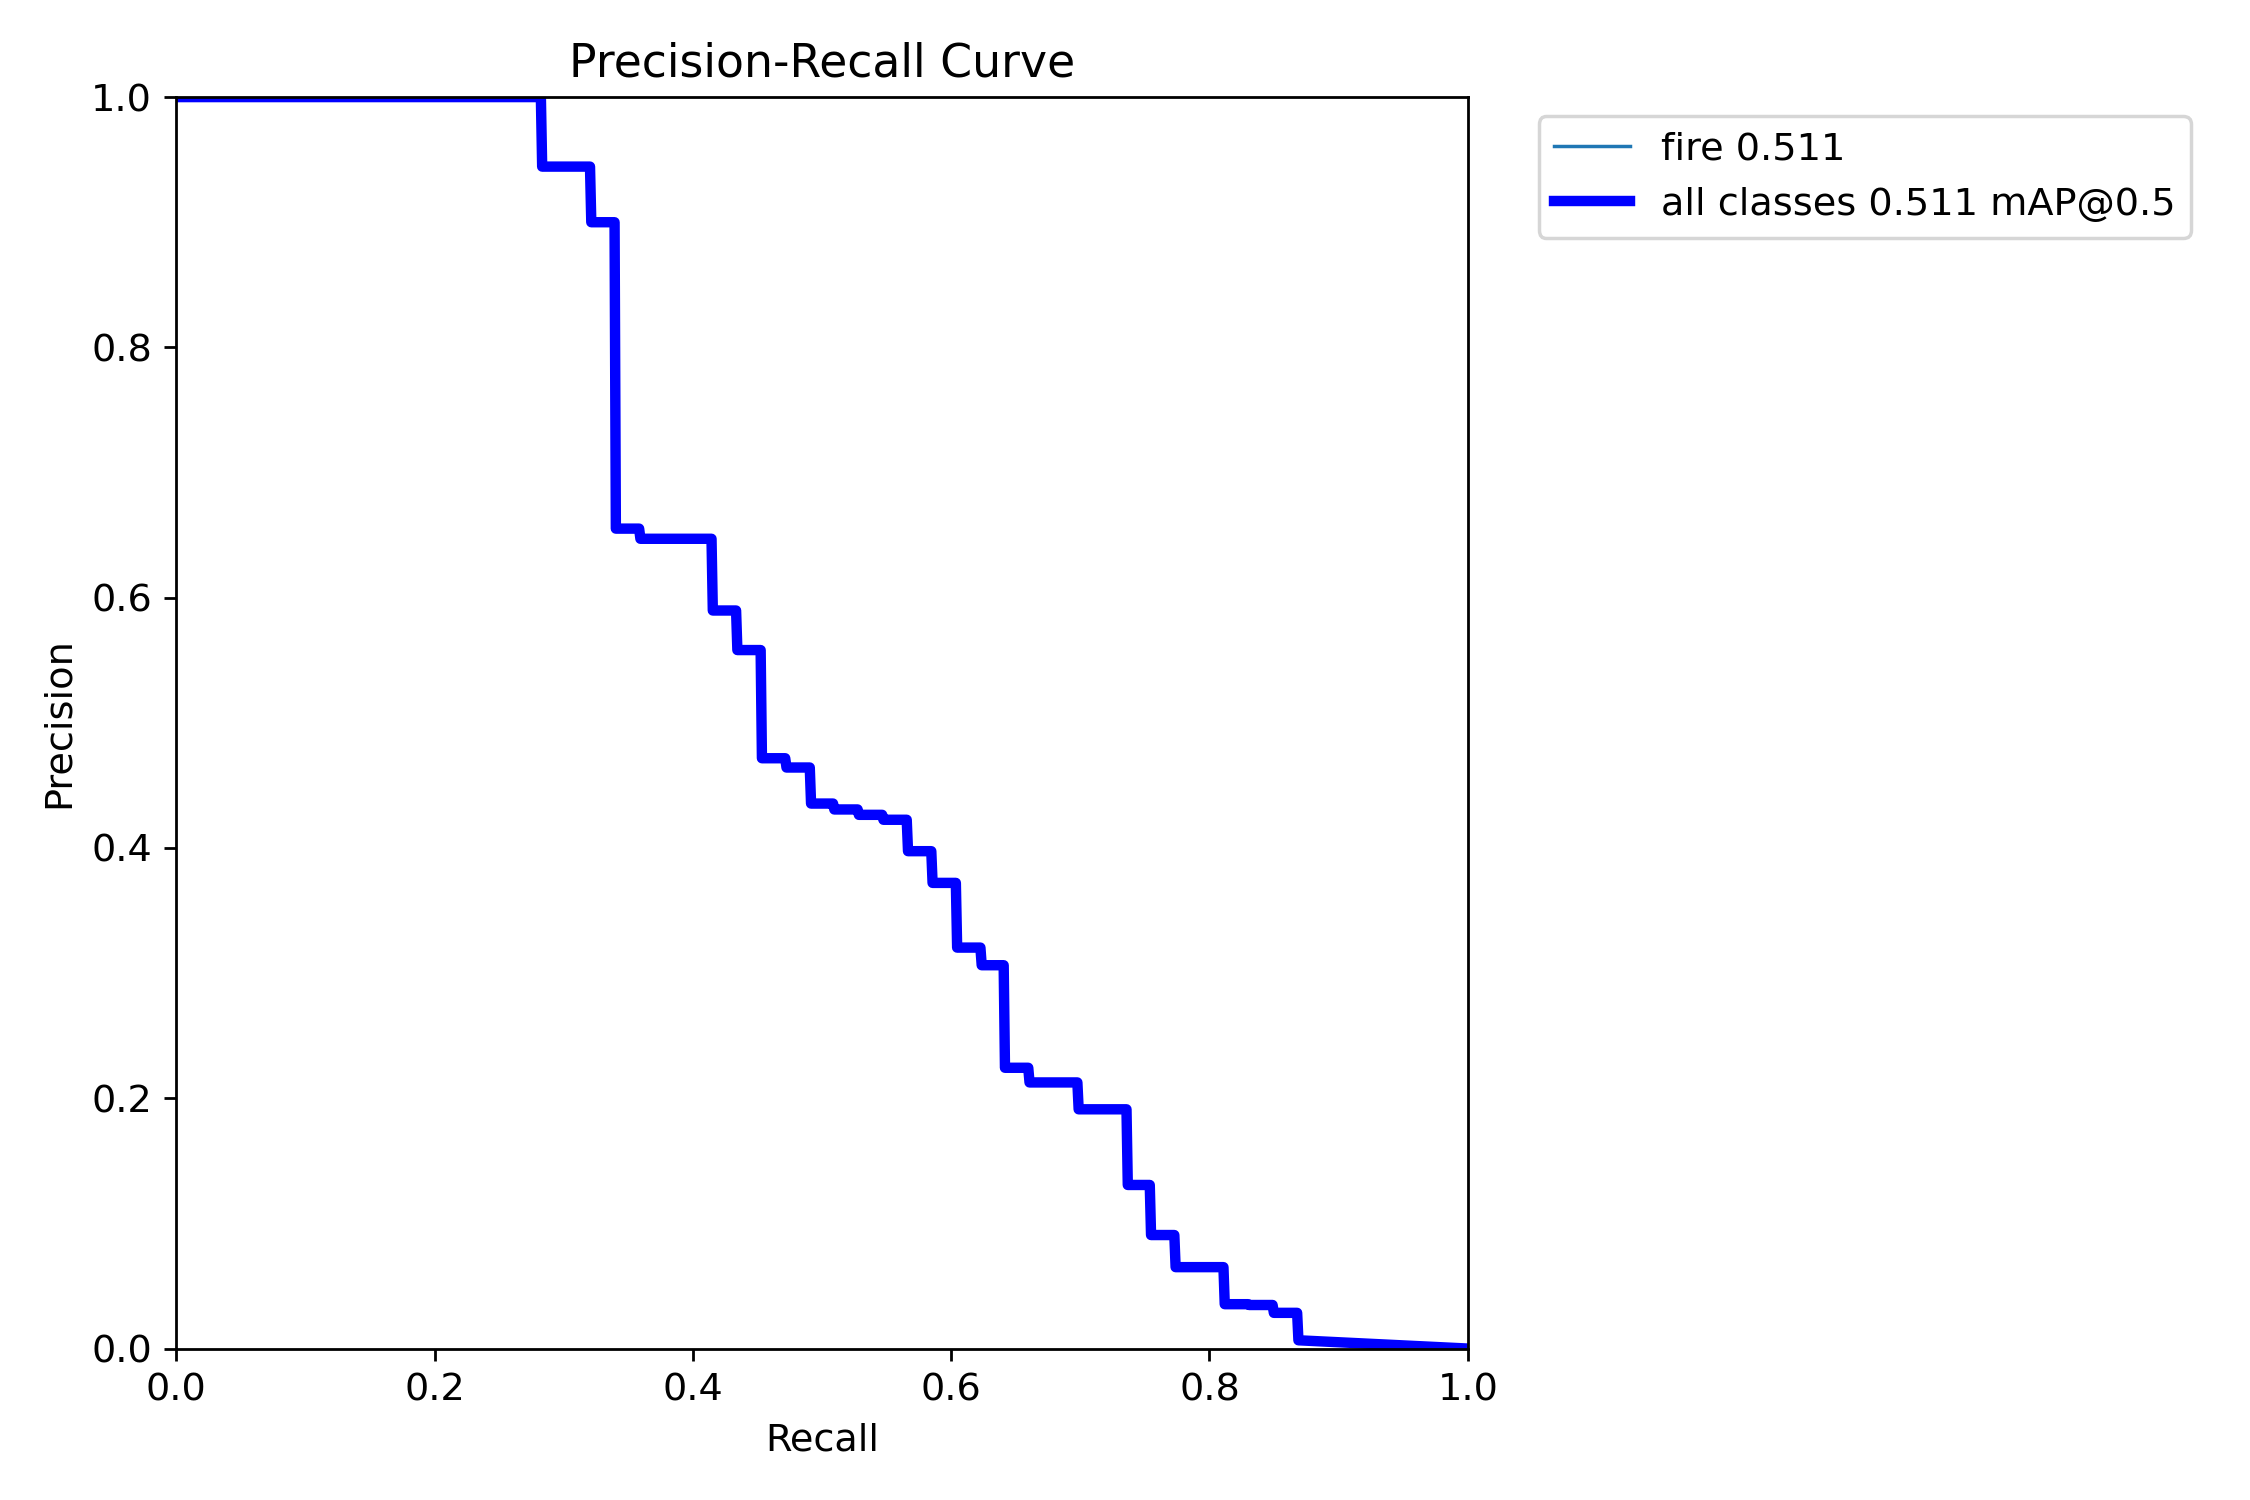

In [ ]:
display(Image(filename='/content/runs/detect/train/PR_curve.png', width=600))

### **Validate fine-tuned model**

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/fire-2/data.yaml

Ultralytics 8.3.2 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/fire-2/valid/labels.cache... 28 images, 0 backgrounds, 0 corrupt: 100% 28/28 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.40it/s]
                   all         28         53      0.605      0.415      0.513      0.282
Speed: 0.2ms preprocess, 13.0ms inference, 0.0ms loss, 19.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# **Inference with custom model**

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/fire-2/test/images save=True

Ultralytics 8.3.2 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/14 /content/fire-2/test/images/Img_2046_jpg.rf.fd9069452fef961c11674f590ba87964.jpg: 640x640 1 fire, 15.7ms
image 2/14 /content/fire-2/test/images/NoiseWEBSmoke1939_jpg.rf.b2cbdb05d2051ac73d017dfbd4f0d92a.jpg: 640x640 2 fires, 9.2ms
image 3/14 /content/fire-2/test/images/NoiseWEBSmoke2570_jpg.rf.52d65771af43981a1f57e5070d285f8d.jpg: 640x640 1 fire, 8.7ms
image 4/14 /content/fire-2/test/images/WEBFire1412_jpg.rf.c309c37d7ea90dae76d5a3d07f931ee6.jpg: 640x640 3 fires, 8.2ms
image 5/14 /content/fire-2/test/images/WEBFire244_jpg.rf.16f74c6f44ab45caa9f211ecd6b89fa0.jpg: 640x640 2 fires, 7.8ms
image 6/14 /content/fire-2/test/images/WEBSmoke1622_jpg.rf.450894c1e91737155f4e0dee8aac5fe1.jpg: 640x640 2 fires, 8.5ms
image 7/14 /content/fire-2/test/images/WEBSmoke2287_jpg.rf.ecea6385ae5946efb6c93437f27c7662.jpg: 640x640 2 fires,

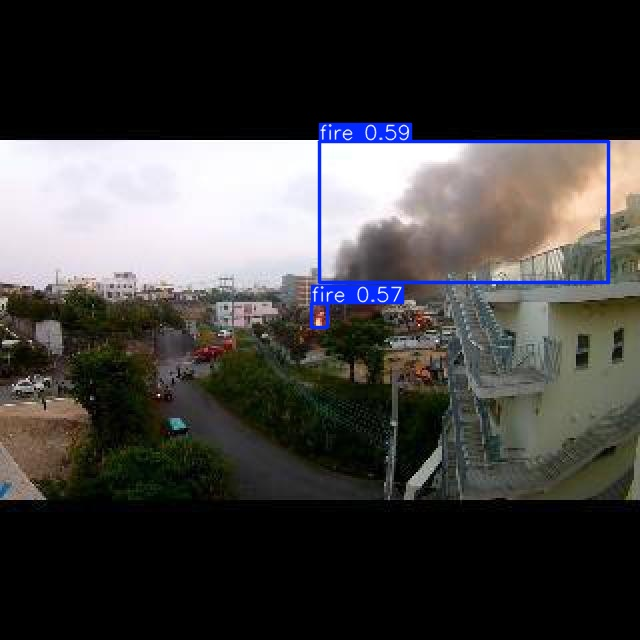

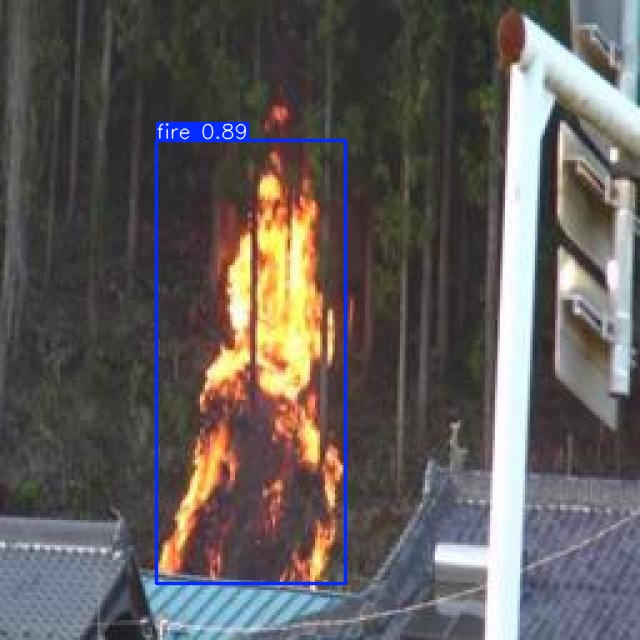

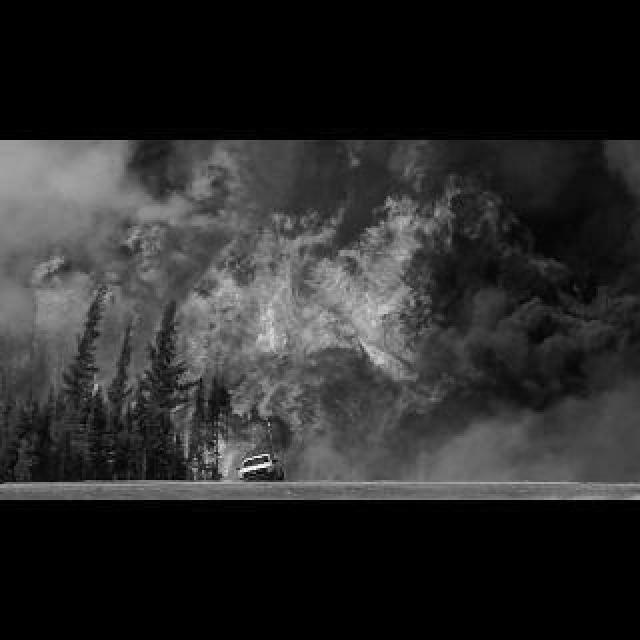

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")